croppedImagePerspectiveTransforms: {'./test_images/straight_lines1.jpg': array([[ -4.61036373e+00,  -1.31674525e+01,   3.60788198e+03],
       [  1.22124533e-15,  -6.53677283e+00,   5.27836092e+02],
       [  7.37257477e-18,  -2.04757800e-02,   1.00000000e+00]]), './test_images/straight_lines2.jpg': array([[ -5.07196913e+00,  -1.40257259e+01,   3.84304890e+03],
       [ -2.55351296e-15,  -7.09059294e+00,   5.53102925e+02],
       [ -1.51788304e-17,  -2.21604713e-02,   1.00000000e+00]])} , croppedImagePerspectiveTransforms.keys: dict_keys(['./test_images/straight_lines1.jpg', './test_images/straight_lines2.jpg'])
fullImagePerspectiveTransforms: {'./test_images/straight_lines1.jpg': array([[ -5.31513375e-01,  -1.51949207e+00,   9.86150355e+02],
       [ -3.99680289e-15,  -1.85192138e+00,   8.56944796e+02],
       [ -6.93889390e-18,  -2.35980489e-03,   1.00000000e+00]]), './test_images/straight_lines2.jpg': array([[ -5.44565668e-01,  -1.50812703e+00,   9.78774441e+02],
       [ -3.5527136

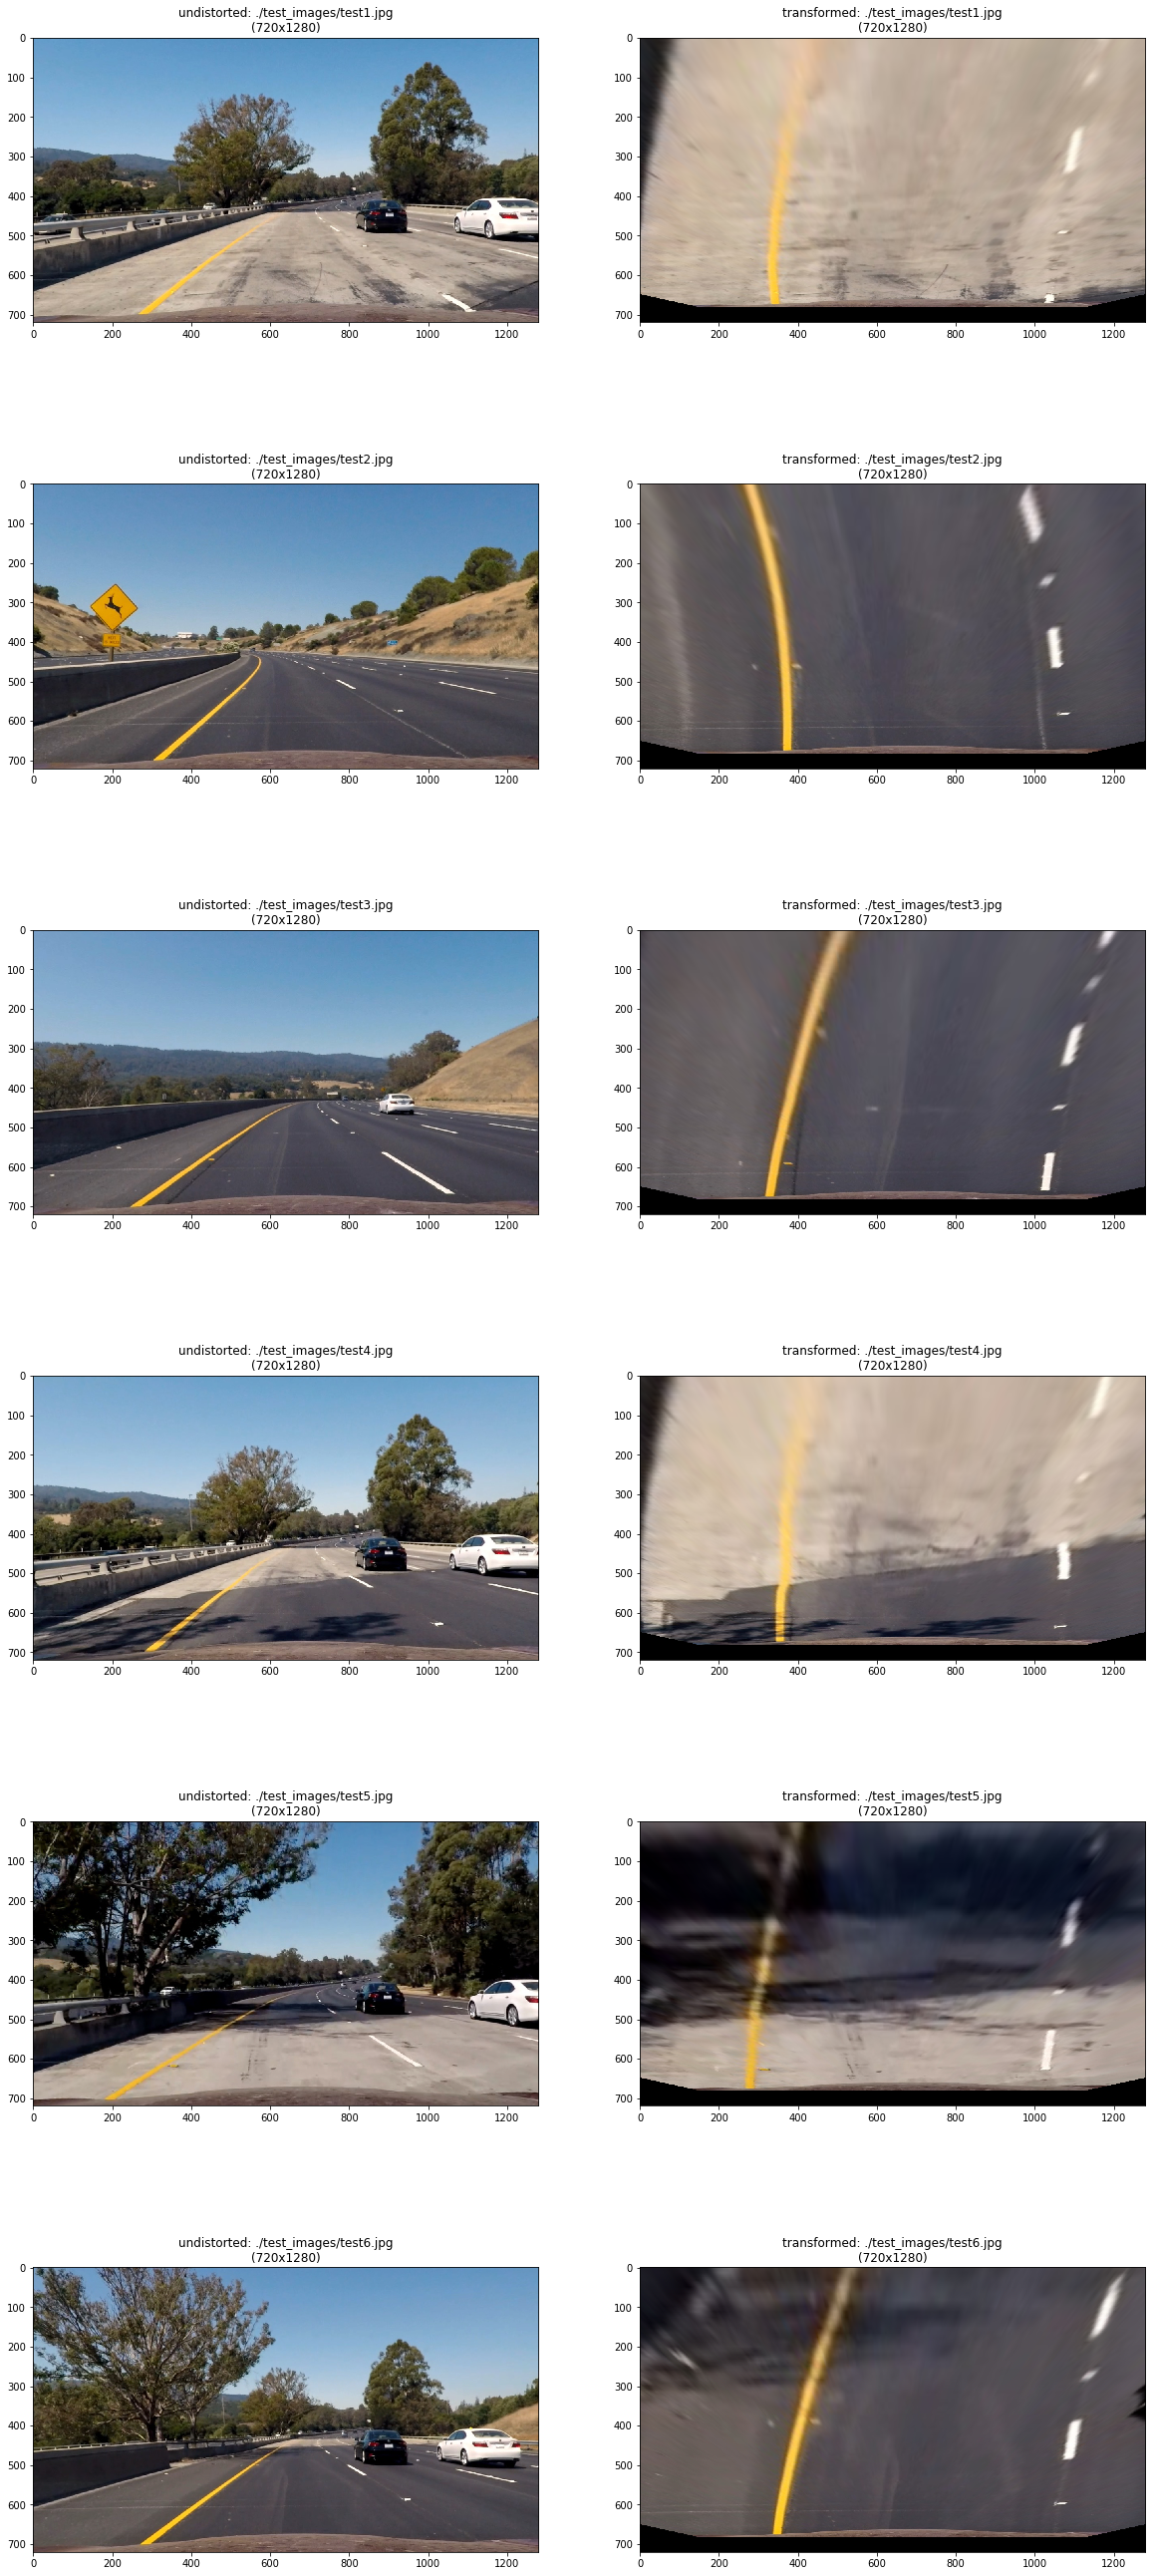

In [1]:
import numpy as np
import cv2

croppedImagePerspectiveTransforms= {'./test_images/straight_lines1.jpg': np.array([[ -4.61036373e+00,  -1.31674525e+01,   3.60788198e+03],
       [  1.22124533e-15,  -6.53677283e+00,   5.27836092e+02],
       [  7.37257477e-18,  -2.04757800e-02,   1.00000000e+00]]), './test_images/straight_lines2.jpg': np.array([[ -5.07196913e+00,  -1.40257259e+01,   3.84304890e+03],
       [ -2.55351296e-15,  -7.09059294e+00,   5.53102925e+02],
       [ -1.51788304e-17,  -2.21604713e-02,   1.00000000e+00]])}
print("croppedImagePerspectiveTransforms:", croppedImagePerspectiveTransforms, ", croppedImagePerspectiveTransforms.keys:", croppedImagePerspectiveTransforms.keys())
# TOPOFTRAPEZOID=.2
fullImagePerspectiveTransforms= {'./test_images/straight_lines1.jpg': np.array([[ -5.31244816e-01,  -1.51726430e+00,   9.84704530e+02],
       [ -1.82076576e-14,  -1.63799355e+00,   7.18279930e+02],
       [ -3.03576608e-17,  -2.35939109e-03,   1.00000000e+00]]), './test_images/straight_lines2.jpg': np.array([[ -5.44776959e-01,  -1.50649420e+00,   9.77714734e+02],
       [ -1.19904087e-14,  -1.65418663e+00,   7.20006876e+02],
       [ -1.99493200e-17,  -2.38024185e-03,   1.00000000e+00]])}
# TOPOFTRAPEZOID=.4
fullImagePerspectiveTransforms= {'./test_images/straight_lines2.jpg': np.array([[ -5.44706987e-01,  -1.50703683e+00,   9.78066903e+02],
       [ -6.43929354e-15,  -1.76349840e+00,   7.90995625e+02],
       [ -1.25767452e-17,  -2.38013403e-03,   1.00000000e+00]]), './test_images/straight_lines1.jpg': np.array([[ -5.31333757e-01,  -1.51800368e+00,   9.85184385e+02],
       [ -7.99360578e-15,  -1.74486685e+00,   7.87582977e+02],
       [ -1.12757026e-17,  -2.35952813e-03,   1.00000000e+00]])}
# TOPOFTRAPEZOID=.6
fullImagePerspectiveTransforms= {'./test_images/straight_lines1.jpg': np.array([[ -5.31513375e-01,  -1.51949207e+00,   9.86150355e+02],
       [ -3.99680289e-15,  -1.85192138e+00,   8.56944796e+02],
       [ -6.93889390e-18,  -2.35980489e-03,   1.00000000e+00]]), './test_images/straight_lines2.jpg': np.array([[ -5.44565668e-01,  -1.50812703e+00,   9.78774441e+02],
       [ -3.55271368e-15,  -1.87266770e+00,   8.61938220e+02],
       [ -6.50521303e-18,  -2.37991628e-03,   1.00000000e+00]])}
print("fullImagePerspectiveTransforms:", fullImagePerspectiveTransforms, ", fullImagePerspectiveTransforms.keys:", fullImagePerspectiveTransforms.keys())

CAMERAMATRIX = np.array([[  1.15730136e+03,   0.00000000e+00,   6.67042380e+02],
                        [  0.00000000e+00,   1.15270113e+03,   3.90488964e+02],
                        [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])
DISTORTIONCOEFFICIENTS = np.array([[ -2.38666546e-01,  -2.98287548e-02,  -5.14437800e-04,  -1.76570650e-04, -4.55111368e-02]])

print("CAMERAMATRIX:", CAMERAMATRIX, ", DISTORTIONCOEFFICIENTS:", DISTORTIONCOEFFICIENTS)
PERSPECTIVETRANSFORM=fullImagePerspectiveTransforms[list(fullImagePerspectiveTransforms.keys())[1]]
print("PERSPECTIVETRANSFORM:", PERSPECTIVETRANSFORM)

SCALEX=1
SCALEY=1

def undistort(rgbImage):
    undistortedImage = cv2.undistort(rgbImage, CAMERAMATRIX, DISTORTIONCOEFFICIENTS, None, CAMERAMATRIX)
    return undistortedImage

def transform(undistortedRgbImage):
    targetImageSize=(SCALEX*undistortedRgbImage.shape[1], SCALEY*undistortedRgbImage.shape[0])
    return cv2.warpPerspective(undistortedRgbImage, PERSPECTIVETRANSFORM, targetImageSize, flags=cv2.INTER_LINEAR)

def transformAndUndistort(rgbImage):
    return tranform(undistort(rgbImage))

import glob

testImageNames=glob.glob("./test_images/test*.jpg")
testImageNames.sort()
print("testImageNames:", testImageNames)

testImageColumnCount=2 # original, transformed
totalImageRows=len(testImageNames) # 1 row per image

import matplotlib.image as mpimage
import matplotlib.pyplot as plt
%matplotlib inline
showTestImages = plt.figure(figsize = (testImageColumnCount*10,totalImageRows*8))

undistortedImages={}
transformedImages={}

for testImageName, testImageIndex in zip(testImageNames, range(0, testImageColumnCount*len(testImageNames), testImageColumnCount)):
    rgbImage=mpimage.imread(testImageName)
    undistortedImage=undistort(rgbImage)
    undistortedImages[testImageName]=undistortedImage
    transformedImage=transform(undistortedImage)
    transformedImages[testImageName]=transformedImage
    
    p=showTestImages.add_subplot(totalImageRows, testImageColumnCount, testImageIndex+1)
    p.set_title("undistorted: "+testImageName+"\n("+str(undistortedImage.shape[0])+"x"+str(undistortedImage.shape[1])+")")
    p.imshow(undistortedImage)

    p=showTestImages.add_subplot(totalImageRows, testImageColumnCount, testImageIndex+2)
    p.set_title("transformed: "+testImageName+"\n("+str(undistortedImage.shape[0])+"x"+str(undistortedImage.shape[1])+")")
    p.imshow(transformedImage)
    path=testImageName.split("/")
    print ("path:", path)
    transformPath="./test_images/transformed/"+path[-1]
    print ("transformPath:", transformPath)
    mpimage.imsave(transformPath, transformedImage)


testImageName:  ./test_images/test1.jpg , binaryImage.shape: (620, 1180) , type: uint8
binaryPath: ./test_images/binary/test1.png
testImageName:  ./test_images/test1.jpg , binaryImage.shape: (620, 1180) , type: uint8
testImageName:  ./test_images/test2.jpg , binaryImage.shape: (620, 1180) , type: uint8
binaryPath: ./test_images/binary/test2.png
testImageName:  ./test_images/test2.jpg , binaryImage.shape: (620, 1180) , type: uint8
testImageName:  ./test_images/test3.jpg , binaryImage.shape: (620, 1180) , type: uint8
binaryPath: ./test_images/binary/test3.png
testImageName:  ./test_images/test3.jpg , binaryImage.shape: (620, 1180) , type: uint8
testImageName:  ./test_images/test4.jpg , binaryImage.shape: (620, 1180) , type: uint8
binaryPath: ./test_images/binary/test4.png
testImageName:  ./test_images/test4.jpg , binaryImage.shape: (620, 1180) , type: uint8
testImageName:  ./test_images/test5.jpg , binaryImage.shape: (620, 1180) , type: uint8
binaryPath: ./test_images/binary/test5.png
te

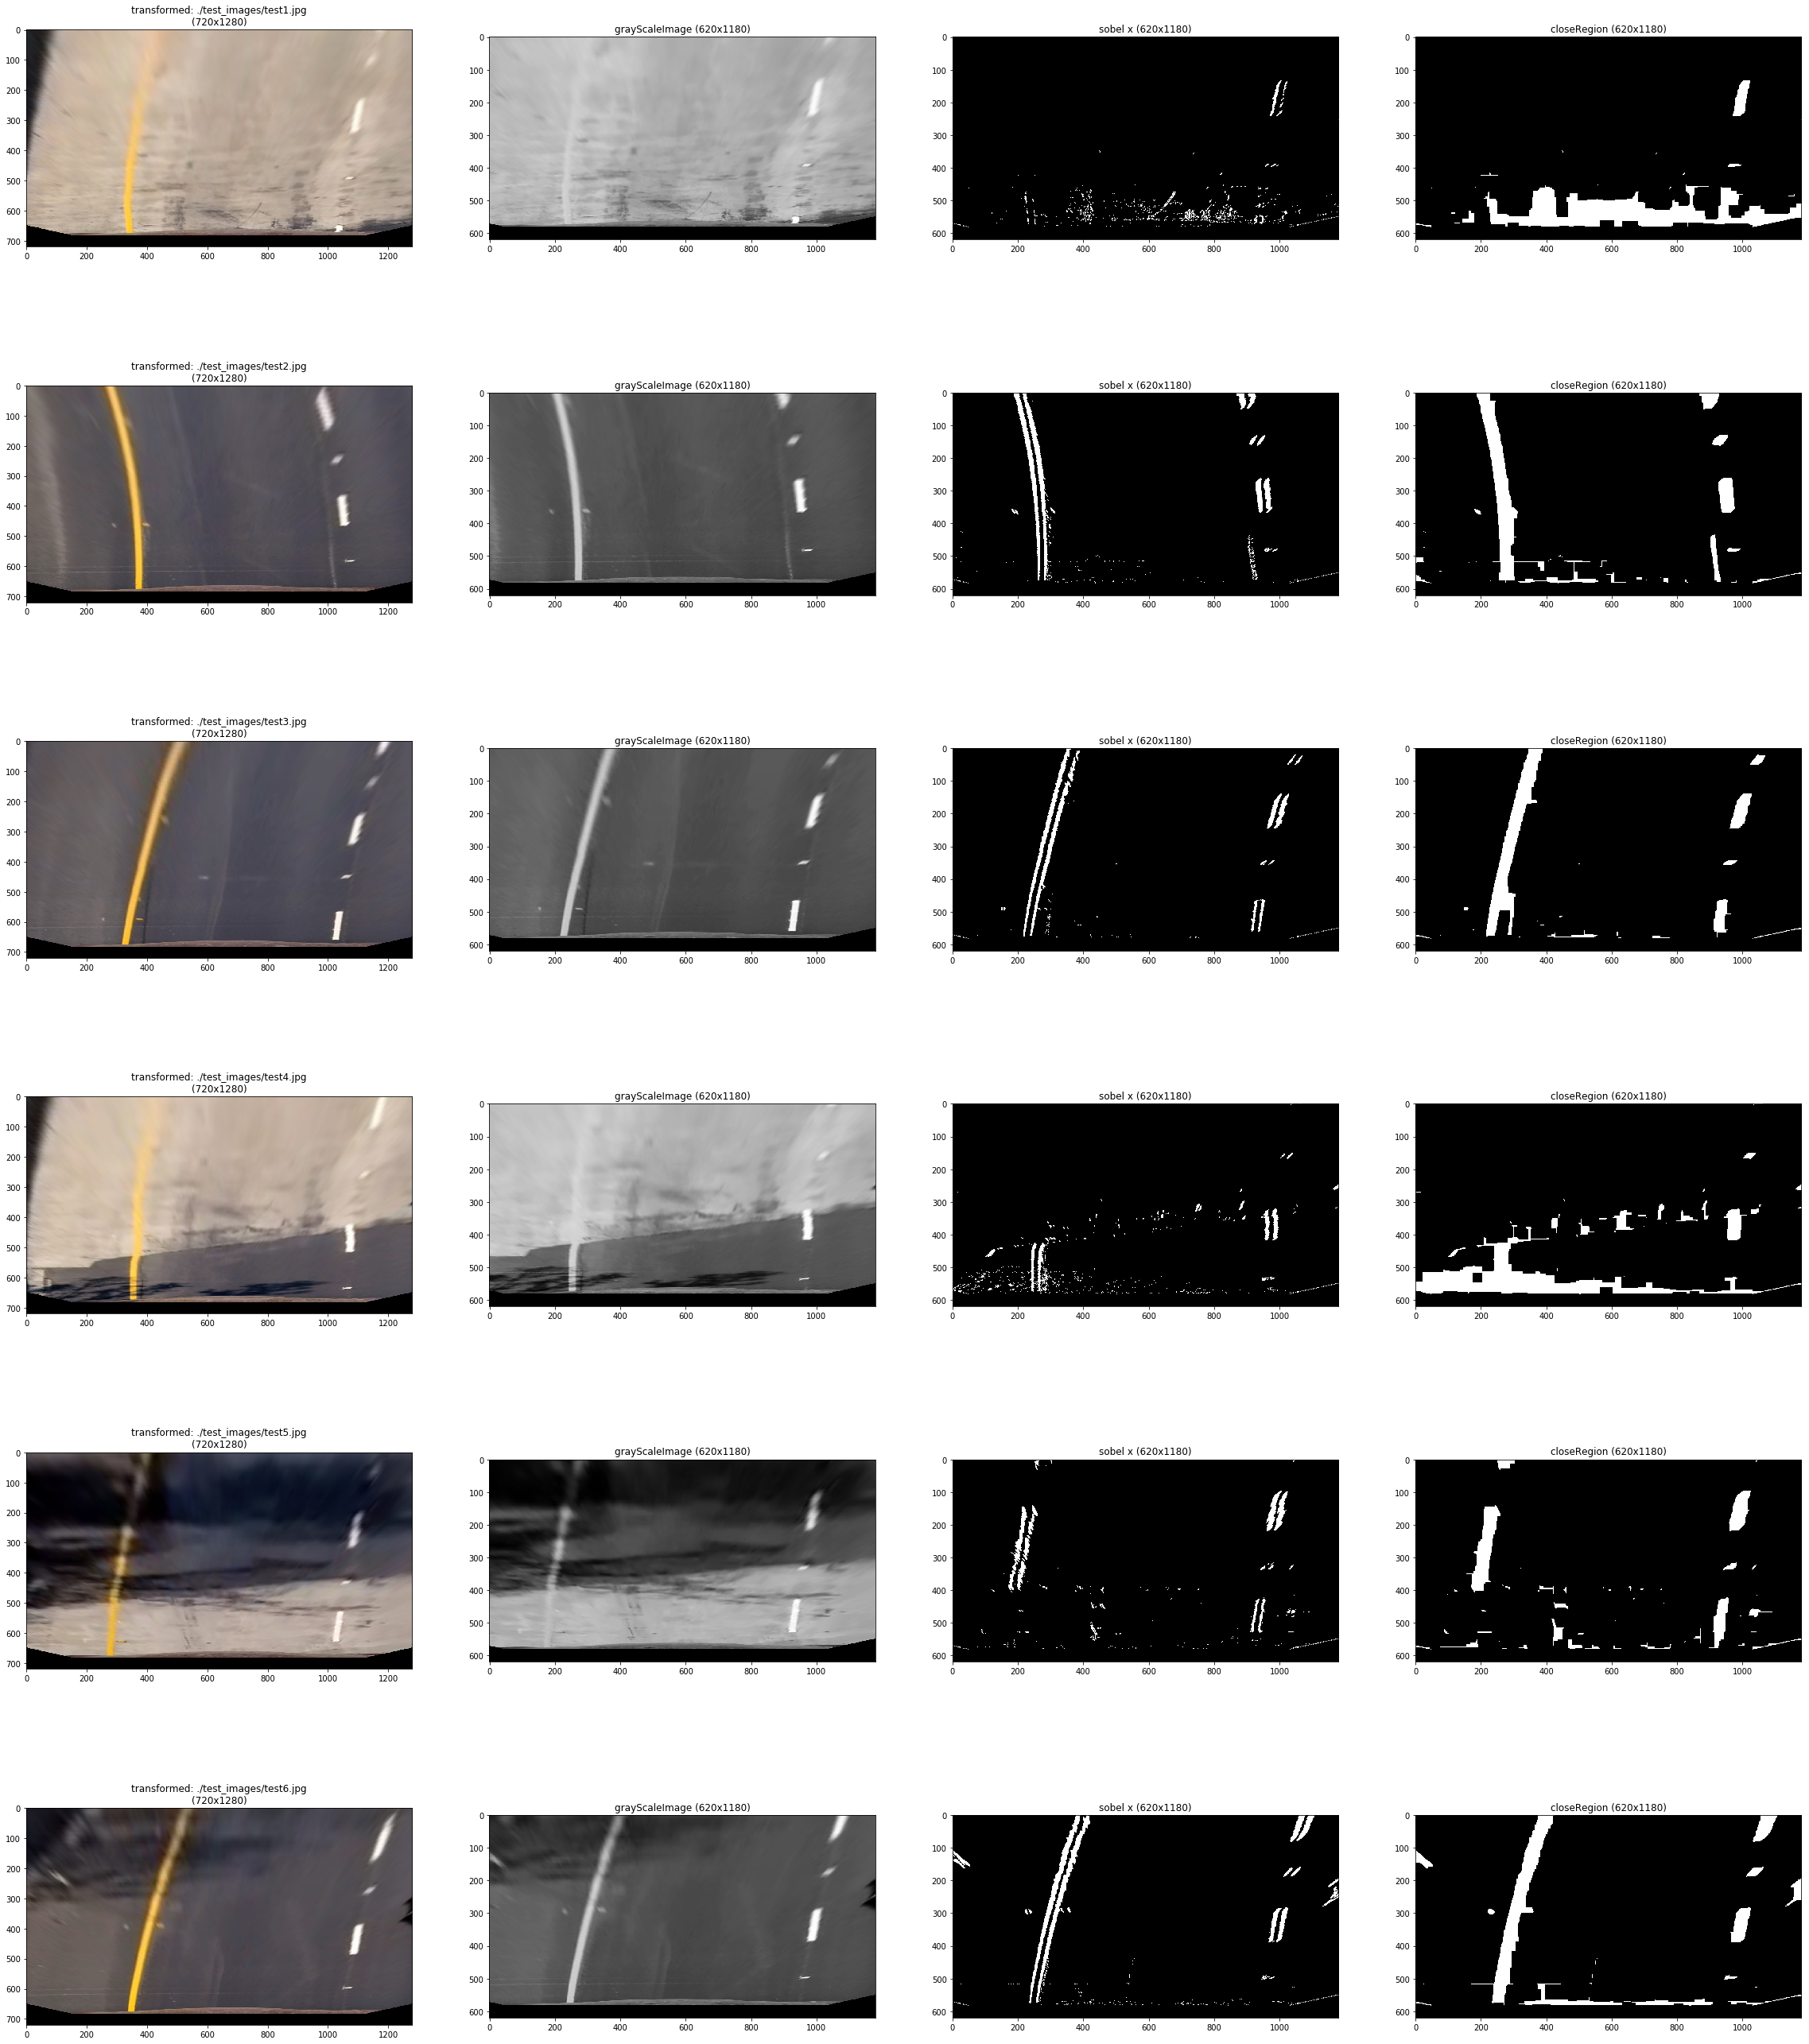

In [26]:
def doConvertToGray(rgbImage):
    #print("rgbImage.shape:", rgbImage.shape, ", type:", type(rgbImage))
    return cv2.cvtColor(rgbImage, cv2.COLOR_RGB2GRAY)

def abs_sobel_thresh(grayImage, orient='x', sobel_kernel=3, thresh=(0, 255)):
    if orient=='x':
        sobel = cv2.Sobel(grayImage, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    else:
        sobel = cv2.Sobel(grayImage, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the derivative or gradient
    absSobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaledSobel = np.uint8(255.*absSobel/float(np.max(absSobel)))
    #print("abs_sobel_thresh-orient:", orient,", scaledSobel counts:", np.unique(scaledSobel, return_counts=True), ", shape:",scaledSobel.shape)
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    scaledSobelBinary = np.zeros_like(scaledSobel)
    #print("abs_sobel_thresh-orient:", orient,", counts:", np.unique(scaledSobelBinary, return_counts=True), ", shape:",scaledSobelBinary.shape)
    scaledSobelBinary[(scaledSobel >= thresh[0]) & (scaledSobel <= thresh[1])] = 1
    #print("abs_sobel_thresh-orient:", orient,", scaledSobelBinary counts:", np.unique(scaledSobelBinary, return_counts=True), ", shape:",scaledSobelBinary.shape)
    # 6) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    #return binary_output
    #
    return scaledSobelBinary

def channelThreshold(rgbImage, channel=0, thresh=(0, 255)):
    # 1) Convert to grayscale
    oneChannel = rgbImage[:,:,channel]
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaledChannel = np.uint8(255.*oneChannel/float(np.max(oneChannel)))
    # 5) Create a binary mask where direction thresholds are met
    channelBinary = np.zeros_like(scaledChannel)
    channelBinary[(scaledChannel >= thresh[0]) & (scaledChannel <= thresh[1])] = 1
    #print("channelThreshold-counts:", np.unique(grayBinary, return_counts=True), ", shape:",grayBinary.shape)
    return channelBinary

def unscaledChannelThreshold(rgbImage, channel=0, thresh=(0, 255)):
    # 1) Convert to grayscale
    oneChannel = rgbImage[:,:,channel]
    # 5) Create a binary mask where direction thresholds are met
    channelBinary = np.zeros_like(oneChannel)
    channelBinary[(oneChannel >= thresh[0]) & (oneChannel <= thresh[1])] = 1
    #print("channelThreshold-counts:", np.unique(grayBinary, return_counts=True), ", shape:",grayBinary.shape)
    return channelBinary

def channelBlueThreshold(rgbImage, thresh=(0, 255)):
    return unscaledChannelThreshold(rgbImage, 2, thresh)

def channelGreenThreshold(rgbImage, thresh=(0, 255)):
    return unscaledChannelThreshold(rgbImage, 1, thresh)

def channelRedThreshold(rgbImage, thresh=(0, 255)):
    return unscaledChannelThreshold(rgbImage, 0, thresh)

def channelYellow(rgbImage):
    redChannel=channelRedThreshold(rgbImage, (225,255))
    #print("channelYellow-redChannel counts:", np.unique(redChannel, return_counts=True), ", shape:",redChannel.shape)
    blueChannel=channelBlueThreshold(rgbImage, (0,175))
    #print("channelYellow-blueChannel counts:", np.unique(blueChannel, return_counts=True), ", shape:",blueChannel.shape)
    greenChannel=channelGreenThreshold(rgbImage, (170,225))
    #print("channelYellow-greenChannel counts:", np.unique(greenChannel, return_counts=True), ", shape:",greenChannel.shape)
    channelBinary = np.zeros_like(redChannel)
    channelBinary[(redChannel==1) & (greenChannel==1)] = 1
    #print("channelYellow-channelBinary counts:", np.unique(channelBinary, return_counts=True), ", shape:",channelBinary.shape)
    return channelBinary

def channelWhite(rgbImage):
    LOWER=190
    UPPER=255
    redChannel=channelRedThreshold(rgbImage, (LOWER,UPPER))
    #print("channelYellow-redChannel counts:", np.unique(redChannel, return_counts=True), ", shape:",redChannel.shape)
    greenChannel=channelGreenThreshold(rgbImage, (LOWER,UPPER))
    #print("channelYellow-greenChannel counts:", np.unique(greenChannel, return_counts=True), ", shape:",greenChannel.shape)
    blueChannel=channelBlueThreshold(rgbImage, (LOWER,UPPER))
    #print("channelYellow-blueChannel counts:", np.unique(blueChannel, return_counts=True), ", shape:",blueChannel.shape)
    channelBinary = np.zeros_like(redChannel)
    channelBinary[(redChannel==1) & (greenChannel==1) & (blueChannel==1)] = 1
    #print("channelYellow-channelBinary counts:", np.unique(channelBinary, return_counts=True), ", shape:",channelBinary.shape)
    return channelBinary

DIALATEKERNELSIZE=5
def closeRegions(image):
    kernel = np.ones((DIALATEKERNELSIZE,DIALATEKERNELSIZE),np.uint8)
    dialatedImage=cv2.dilate(image.copy(), kernel, iterations=7)
    dialatedImage=cv2.erode(dialatedImage, kernel, iterations=7)
    imageWidth=dialatedImage.shape[1] # X
    imageHeight=dialatedImage.shape[0] # Y
    #lostPixels=int(DIALATEKERNELSIZE/2)
    #print("lostPixels:",lostPixels, ", DIALATEKERNELSIZE:", DIALATEKERNELSIZE, ". dialatedImage.shape", dialatedImage.shape)
    #return dialatedImage[lostPixels:imageHeight-lostPixels, lostPixels:imageWidth-lostPixels]
    return dialatedImage

BLURKERNELSIZE = 5
def doBlur(image):
    blurred = cv2.GaussianBlur(image,(BLURKERNELSIZE, BLURKERNELSIZE), 0)
    return blurred

MASKFILLVALUE = 0;
CONNECTIVITY = 4 # 4 way
def floodLaneMarker(rgbImage, theSeedPoints):
    #print("floodRoad-rgbImage.shape:", rgbImage.shape, ", theSeedPoints:", theSeedPoints)
    grayscaleImage=doConvertToGray(rgbImage.copy())
    blurredGrayImage = doBlur(grayscaleImage)
    imageWidth=blurredGrayImage.shape[1] # X
    imageHeight=blurredGrayImage.shape[0] # Y
    roadFlags = CONNECTIVITY | (MASKFILLVALUE << 1)
    # for gray scale image
    roadMask = np.zeros((imageHeight+2, imageWidth+2), np.uint8)
    #print('grayScale:', type(grayScale), 'with dimensions:', grayScale.shape, 'road flags: <', hex(roadFlags), '>, theSeedPoints:', theSeedPoints)
    for seedPoint in theSeedPoints:
        #print('seedPoint:', seedPoint," type: ", type(seedPoint)) 
        #print('road seed color:', grayScale[seedPoint[1], seedPoint[0]]," at ", seedPoint) 
        cv2.floodFill(blurredGrayImage, roadMask, seedPoint, 255, 1, 1, roadFlags)
    return grayscaleImage, roadMask

def floodColorLaneMarker(rgbImage, theSeedPoints):
    #print("floodRoad-rgbImage.shape:", rgbImage.shape, ", theSeedPoints:", theSeedPoints)
    imageWidth=rgbImage.shape[1] # X
    imageHeight=rgbImage.shape[0] # Y
    flags = CONNECTIVITY | (MASKFILLVALUE << 1)
    # for gray scale image
    mask = np.zeros((imageHeight+2, imageWidth+2), np.uint8)
    #print('grayScale:', type(grayScale), 'with dimensions:', grayScale.shape, 'road flags: <', hex(roadFlags), '>, theSeedPoints:', theSeedPoints)
    for seedPoint in theSeedPoints:
        print('seedPoint:', seedPoint," type: ", type(seedPoint)) 
        print('rgbImage color:', rgbImage[seedPoint[0], seedPoint[1]]," at ", seedPoint) 
        cv2.floodFill(rgbImage, mask, seedPoint, 255, 1, 1, flags)
    return mask

import matplotlib.image as mpimage
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

maskImageColumnCount=4 # transformed, gray, sobel
maskTotalImageRows=len(testImageNames) # 1 row per image

showMaskImages = plt.figure(figsize = (maskImageColumnCount*10, maskTotalImageRows*8))

for testImageName, testImageIndex in zip(testImageNames, range(0, maskImageColumnCount*len(testImageNames), maskImageColumnCount)):
    transformedImage=transformedImages[testImageName]
    
    p=showMaskImages.add_subplot(maskTotalImageRows, maskImageColumnCount, testImageIndex+1)
    p.set_title("transformed: "+testImageName+"\n("+str(undistortedImage.shape[0])+"x"+str(undistortedImage.shape[1])+")")
    p.imshow(transformedImage)

    grayScaleImage=doConvertToGray(transformedImage[100:,100:]) # cropping 100 pixels off the leaft and off the top
    p=showMaskImages.add_subplot(maskTotalImageRows, maskImageColumnCount, testImageIndex+2)
    p.set_title("grayScaleImage ("+str(grayScaleImage.shape[0])+"x"+str(grayScaleImage.shape[1])+")")
    p.imshow(grayScaleImage, cmap='gray')

    sobelImage=abs_sobel_thresh(grayScaleImage, orient='x', sobel_kernel=3, thresh=(20, 255))
    p=showMaskImages.add_subplot(maskTotalImageRows, maskImageColumnCount, testImageIndex+3)
    p.set_title("sobel x ("+str(sobelImage.shape[0])+"x"+str(sobelImage.shape[1])+")")
    p.imshow(sobelImage, cmap='gray')
    
    closeRegion=closeRegions(sobelImage)
    p=showMaskImages.add_subplot(maskTotalImageRows, maskImageColumnCount, testImageIndex+4)
    p.set_title("closeRegion ("+str(sobelImage.shape[0])+"x"+str(sobelImage.shape[1])+")")
    p.imshow(closeRegion, cmap='gray')

    #yellowImage=channelYellow(transformedImage)
    #p=showMaskImages.add_subplot(maskTotalImageRows, maskImageColumnCount, testImageIndex+4)
    #p.set_title("yellowImage ("+str(sobelImage.shape[0])+"x"+str(sobelImage.shape[1])+")")
    #p.imshow(yellowImage, cmap='gray')
    
    #whiteImage=channelWhite(transformedImage)
    #p=showMaskImages.add_subplot(maskTotalImageRows, maskImageColumnCount, testImageIndex+5)
    #p.set_title("whiteImage ("+str(sobelImage.shape[0])+"x"+str(sobelImage.shape[1])+")")
    #p.imshow(whiteImage, cmap='gray')
    
    binaryImage=closeRegion
    print("testImageName: ",testImageName, ", binaryImage.shape:", binaryImage.shape, ", type:", binaryImage.dtype)

    path=testImageName.split("/")
    #print ("path:", path)
    imageName=path[-1].split(".")
    #print ("imageName:", imageName)
    binaryPath="./test_images/binary/"+imageName[-2]+".png"
    print ("binaryPath:", binaryPath)
    import cv2
    cv2.imwrite(binaryPath, binaryImage) # mpimage saves it as float32
    binaryImage=cv2.imread(binaryPath, flags=0) # mpimage reads it back as float 32, flags=0 is grayscale
    print("testImageName: ",testImageName, ", binaryImage.shape:", binaryImage.shape, ", type:", binaryImage.dtype)

